## Load CSV & Imports

In this first step, we load the tripadvisor_hotel_reviews data and also import the necessary libraries for analysing data in a data science manner.

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from wordcloud import WordCloud

In [77]:
review_data = pd.read_csv('../data/raw_data/tripadvisor_hotel_reviews.csv')

review_data.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [78]:
review_data.shape

(20491, 2)

In [79]:
review_data.columns

Index(['Review', 'Rating'], dtype='object')

**Info**

Below we see that the dataset doesn't contain of missing values.

In [80]:
review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [81]:
review_data.describe()

,Rating
count,20491.000000
mean,3.952223
std,1.233030
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [82]:
review_data['Review_length_words'] = review_data['Review'].apply(lambda row: len(row.split()))


In [83]:
review_data.head()

,Review,Rating,Review_length_words
0,nice hotel expensive parking got good deal sta...,4,87
1,ok nothing special charge diamond member hilto...,2,250
2,nice rooms not 4* experience hotel monaco seat...,3,217
3,"unique, great stay, wonderful time hotel monac...",5,89
4,"great stay great stay, went seahawk game aweso...",5,191


**Word Count**

Word count is mostly long enough and the reviews with less than 10 words seem to be reasonably long enough to give a detailed description.

In [84]:
print("Count:", (review_data['Review_length_words'] < 10).sum())
short_reviews = review_data[review_data['Review_length_words'] < 10]
short_reviews


Count: 8


,Review,Rating,Review_length_words
488,"issues n't say 4 star service great pool bar,",3,9
1501,"loved resort amazing space lot, not bored,",5,7
4524,"feeling cheated, westin signature comfy bed wi...",4,9
10446,glad stayed great experience stay time steps p...,4,9
13994,decent place stay price bed right bathroom max...,3,9
16736,clean hotel attentive welcoming staff infinity...,4,9
16969,"number hotel number ranking, perfect way, best...",5,9
18073,"nice hotel view second room room left row,",5,8


**Star Rating**

`5` and `4` star ratings appear slightly too dominant in this dataset. This heavy concentration of high ratings does not fully reflect typical real-world review distributions, where feedback is usually more mixed. Such an imbalance suggests a positive bias, meaning users may be more inclined to leave reviews when they have had a good experience, potentially masking a broader range of customer sentiments.

In [85]:
review_data['Rating'].value_counts()

Rating
5    9054
4    6039
3    2184
2    1793
1    1421
Name: count, dtype: int64

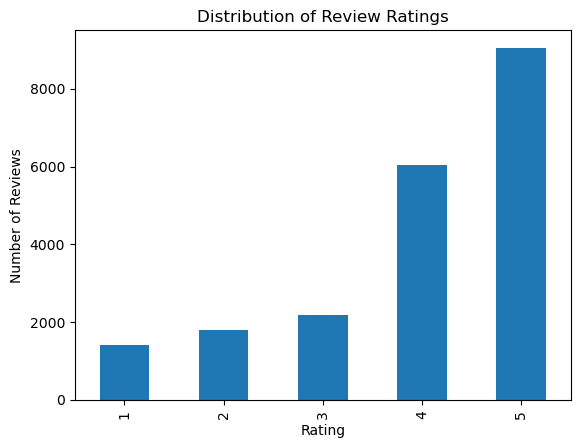

In [86]:
review_data['Rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Review Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()

In [87]:
review_data['Review'] = review_data['Review'].str.lower()
#For WordCloud
text = " ".join(review_data['Review'])
#For common words
words = " ".join(review_data['Review']).split()
words

['nice',
 'hotel',
 'expensive',
 'parking',
 'got',
 'good',
 'deal',
 'stay',
 'hotel',
 'anniversary,',
 'arrived',
 'late',
 'evening',
 'took',
 'advice',
 'previous',
 'reviews',
 'did',
 'valet',
 'parking,',
 'check',
 'quick',
 'easy,',
 'little',
 'disappointed',
 'non-existent',
 'view',
 'room',
 'room',
 'clean',
 'nice',
 'size,',
 'bed',
 'comfortable',
 'woke',
 'stiff',
 'neck',
 'high',
 'pillows,',
 'not',
 'soundproof',
 'like',
 'heard',
 'music',
 'room',
 'night',
 'morning',
 'loud',
 'bangs',
 'doors',
 'opening',
 'closing',
 'hear',
 'people',
 'talking',
 'hallway,',
 'maybe',
 'just',
 'noisy',
 'neighbors,',
 'aveda',
 'bath',
 'products',
 'nice,',
 'did',
 'not',
 'goldfish',
 'stay',
 'nice',
 'touch',
 'taken',
 'advantage',
 'staying',
 'longer,',
 'location',
 'great',
 'walking',
 'distance',
 'shopping,',
 'overall',
 'nice',
 'experience',
 'having',
 'pay',
 '40',
 'parking',
 'night,',
 'ok',
 'nothing',
 'special',
 'charge',
 'diamond',
 'memb

**Word Counts**

The bar chart shows the most common words found in the TripAdvisor hotel reviews. Many of these words, such as `hotel`, `room`, `staff`, `service`, and `location`, are typical for this kind of dataset because they describe important parts of a hotel stay.

It is also interesting that words like `not` and `n't` appear very often. These words show that many reviews include negations, which can signal negative comments or complaints. This will be useful later when analyzing topics or understanding sentiment in the reviews.

Other frequent words, such as “great”, `good`, `nice`, and `stay`, suggest that many guests also wrote about positive experiences.

Overall, the word frequency results tell us that the dataset contains a mix of positive and negative expressions, which makes it a good base for clustering and topic modeling.

<Axes: xlabel='Word'>

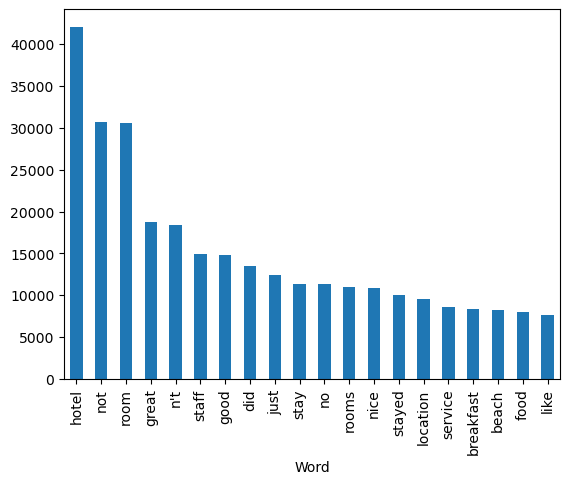

In [88]:
from collections import Counter
word_counts = Counter(words)
common_words = word_counts.most_common(20)
top20 = pd.DataFrame(common_words, columns=['Word', 'Count'])
top20.plot(kind='bar', x='Word', y='Count', legend=False)

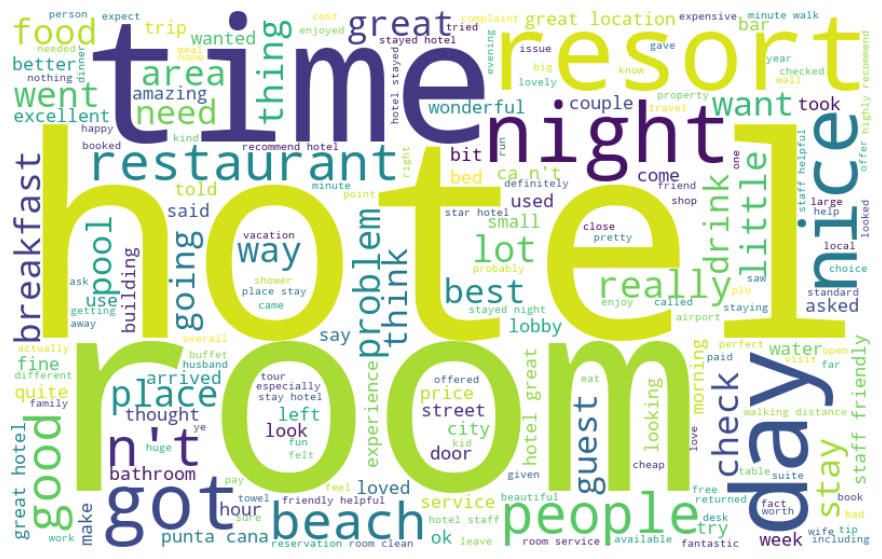

In [89]:
wordcoud = WordCloud(width=800, height=500, background_color='white').generate(text)
plt.figure(figsize=(15, 7))
plt.imshow(wordcoud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Insight Summary

The exploratory data analysis shows that the dataset is generally clean and well-structured. There are no missing values, and most reviews are of adequate length, with only a few extremely short entries. This indicates good data quality for further NLP processing.

**Common repeated words such as:**
- hotel
- room
- great
- good
- not
- did
- n't

reflect typical hotel review terminology and also show frequent use of negation, which will be relevant for interpreting topics later.

The rating distribution is clearly imbalanced, with a high number of 5-star reviews. This suggests a strong bias toward positive experiences, which is common in customer review datasets but should be kept in mind when analyzing clusters or topics.

Overall, the dataset appears suitable for clustering and topic modeling, with only minor cleaning steps needed.